## Customer Segmentation / Clustering

### Aim :
- Perform customer segmentation using clustering techniques. Use both profile information (from Customers.csv) and transaction information (from Transactions.csv).

### Data Description
#### 1.Customers.csv
- CustomerID: Unique identifier for each customer.
- CustomerName: Name of the customer.
- Region: Continent where the customer resides.
- SignupDate: Date when the customer signed up.
#### 2. Transactions.csv
- TransactionID: Unique identifier for each transaction.
- CustomerID: ID of the customer who made the transaction.
- ProductID: ID of the product sold.
- TransactionDate: Date of the transaction.
- Quantity: Quantity of the product purchased.
- TotalValue: Total value of the transaction.
- Price: Price of the product sold.

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
#read the Customer data
customer_df=pd.read_csv("Customers.csv")

In [3]:
# Read the Transaction Data
transaction_df=pd.read_csv("Transactions.csv")

In [4]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customer_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [7]:
transaction_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:
# merge the transaction and customer dataframe using the CustomerID
merged_df=pd.merge(transaction_df,customer_df,on='CustomerID',how='inner')

In [11]:
merged_df.shape

(1000, 10)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


In [13]:
merged_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [14]:
merged_df.duplicated().sum()

0

- No missing values and no duplicates in merged data.

In [15]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04


In [16]:
# Extract the year of Transaction and Signup year using Transaction Date and SignupDate
merged_df["TransactionYear"]=merged_df["TransactionDate"].str.split(" ").str[0].str.split("-").str[0]
merged_df["TransactionMonth"]=merged_df["TransactionDate"].str.split(" ").str[0].str.split("-").str[1]
merged_df["SignupYear"]=merged_df["SignupDate"].str.split(" ").str[0].str.split("-").str[0]

In [17]:
merged_df["TransactionYear"]=merged_df["TransactionYear"].astype(int)
merged_df["TransactionMonth"]=merged_df["TransactionMonth"].astype(int)
merged_df["SignupYear"]=merged_df["SignupYear"].astype(int)

In [18]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,TransactionYear,TransactionMonth,SignupYear
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2024,8,2022
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03,2024,10,2022
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03,2024,8,2022
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03,2024,10,2022
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,5,2024


In [19]:
# create the new dataframe by grouping the data with CustomerID.
# create features like Total_spend, Total Transactions, Total_qunatity for each customer
customer_features=merged_df.groupby("CustomerID").agg(
    total_spend=("TotalValue",'sum'),
    
    Average_transaction_spend=("TotalValue","mean"),
    Transactions_count=('TransactionID',"count"),
    Transactions_months_count=("TransactionMonth","nunique"),
    Total_quantity=("Quantity","sum"),
    TransactionYear=('TransactionYear','first'),
    SignupYear=("SignupYear","first"),
).reset_index()

In [20]:
customer_features.head()

,CustomerID,total_spend,Average_transaction_spend,Transactions_count,Transactions_months_count,Total_quantity,TransactionYear,SignupYear
0,C0001,3354.52,670.904,5,5,12,2024,2022
1,C0002,1862.74,465.685,4,4,10,2024,2022
2,C0003,2725.38,681.345,4,3,14,2024,2024
3,C0004,5354.88,669.360,8,7,23,2024,2022
4,C0005,2034.24,678.080,3,3,7,2024,2022


In [21]:
# Extraction the Average Transactions per Month using the Transaction Count and Unique months Transaction.
customer_features['Avg_transaction_per_month']=(customer_features['Transactions_count']/customer_features['Transactions_months_count']).astype(int)

In [22]:
customer_features.head()

,CustomerID,total_spend,Average_transaction_spend,Transactions_count,Transactions_months_count,Total_quantity,TransactionYear,SignupYear,Avg_transaction_per_month
0,C0001,3354.52,670.904,5,5,12,2024,2022,1
1,C0002,1862.74,465.685,4,4,10,2024,2022,1
2,C0003,2725.38,681.345,4,3,14,2024,2024,1
3,C0004,5354.88,669.360,8,7,23,2024,2022,1
4,C0005,2034.24,678.080,3,3,7,2024,2022,1


In [23]:
# Add the Region for Each Customer using the Customer Data.
customer_features=pd.merge(customer_features,customer_df[['CustomerID','Region']],on='CustomerID',how='inner')

In [24]:
customer_features.head()

,CustomerID,total_spend,Average_transaction_spend,Transactions_count,Transactions_months_count,Total_quantity,TransactionYear,SignupYear,Avg_transaction_per_month,Region
0,C0001,3354.52,670.904,5,5,12,2024,2022,1,South America
1,C0002,1862.74,465.685,4,4,10,2024,2022,1,Asia
2,C0003,2725.38,681.345,4,3,14,2024,2024,1,South America
3,C0004,5354.88,669.360,8,7,23,2024,2022,1,South America
4,C0005,2034.24,678.080,3,3,7,2024,2022,1,Asia


In [25]:
# Here the final Features.
final_features=customer_features[['total_spend','Average_transaction_spend','Transactions_count','Total_quantity','TransactionYear','SignupYear','Avg_transaction_per_month','Region']]

In [26]:
final_features.head()

,total_spend,Average_transaction_spend,Transactions_count,Total_quantity,TransactionYear,SignupYear,Avg_transaction_per_month,Region
0,3354.52,670.904,5,12,2024,2022,1,South America
1,1862.74,465.685,4,10,2024,2022,1,Asia
2,2725.38,681.345,4,14,2024,2024,1,South America
3,5354.88,669.360,8,23,2024,2022,1,South America
4,2034.24,678.080,3,7,2024,2022,1,Asia


In [27]:
final_features.describe()

,total_spend,Average_transaction_spend,Transactions_count,Total_quantity,TransactionYear,SignupYear,Avg_transaction_per_month
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,3467.314372,687.580182,5.025126,12.748744,2023.989950,2023.075377,1.025126
std,1832.677958,237.936649,2.198340,6.151060,0.099997,0.846470,0.156901
min,82.360000,82.360000,1.000000,1.000000,2023.000000,2022.000000,1.000000
25%,2162.040000,542.941667,3.000000,8.500000,2024.000000,2022.000000,1.000000
50%,3137.660000,677.207500,5.000000,12.000000,2024.000000,2023.000000,1.000000
75%,4770.225000,828.624167,6.000000,17.000000,2024.000000,2024.000000,1.000000
max,10673.870000,1323.133333,11.000000,32.000000,2024.000000,2024.000000,2.000000


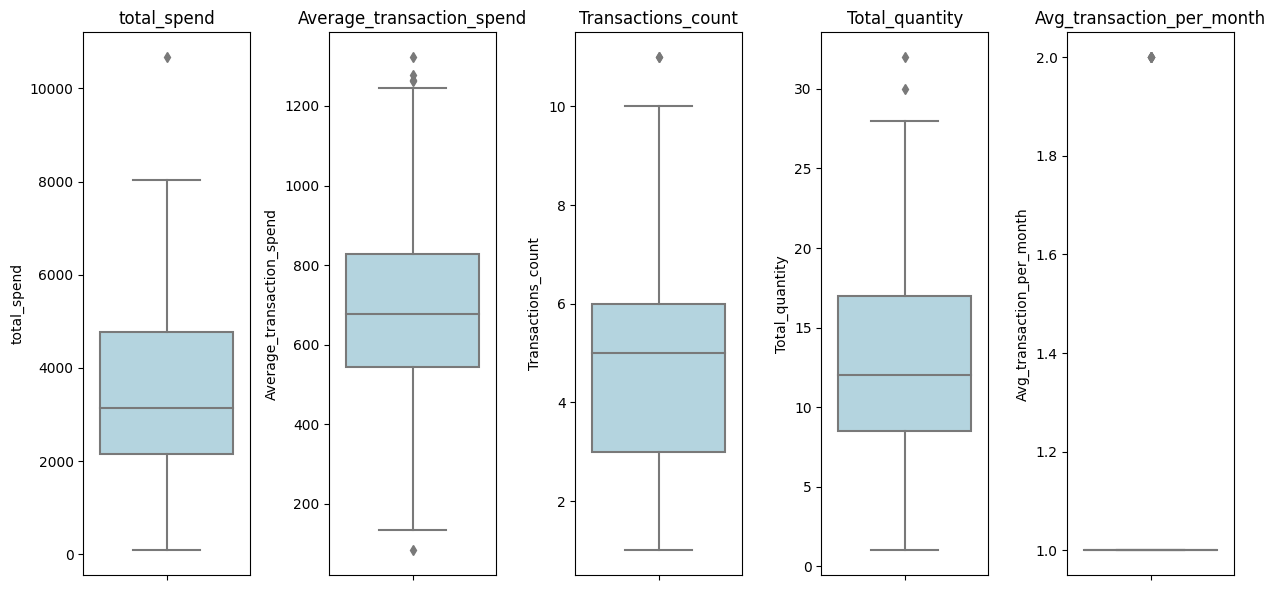

In [28]:
# Find whether any outliers in the data or not.
features = ["total_spend", "Average_transaction_spend", "Transactions_count", "Total_quantity", "Avg_transaction_per_month"]

# Plot the boxplot for each numeric feature.

plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 6, i) 
    sns.boxplot(y=final_features[feature], color="lightblue")
    plt.title(feature)
    plt.xlabel("")

plt.tight_layout()
plt.show()

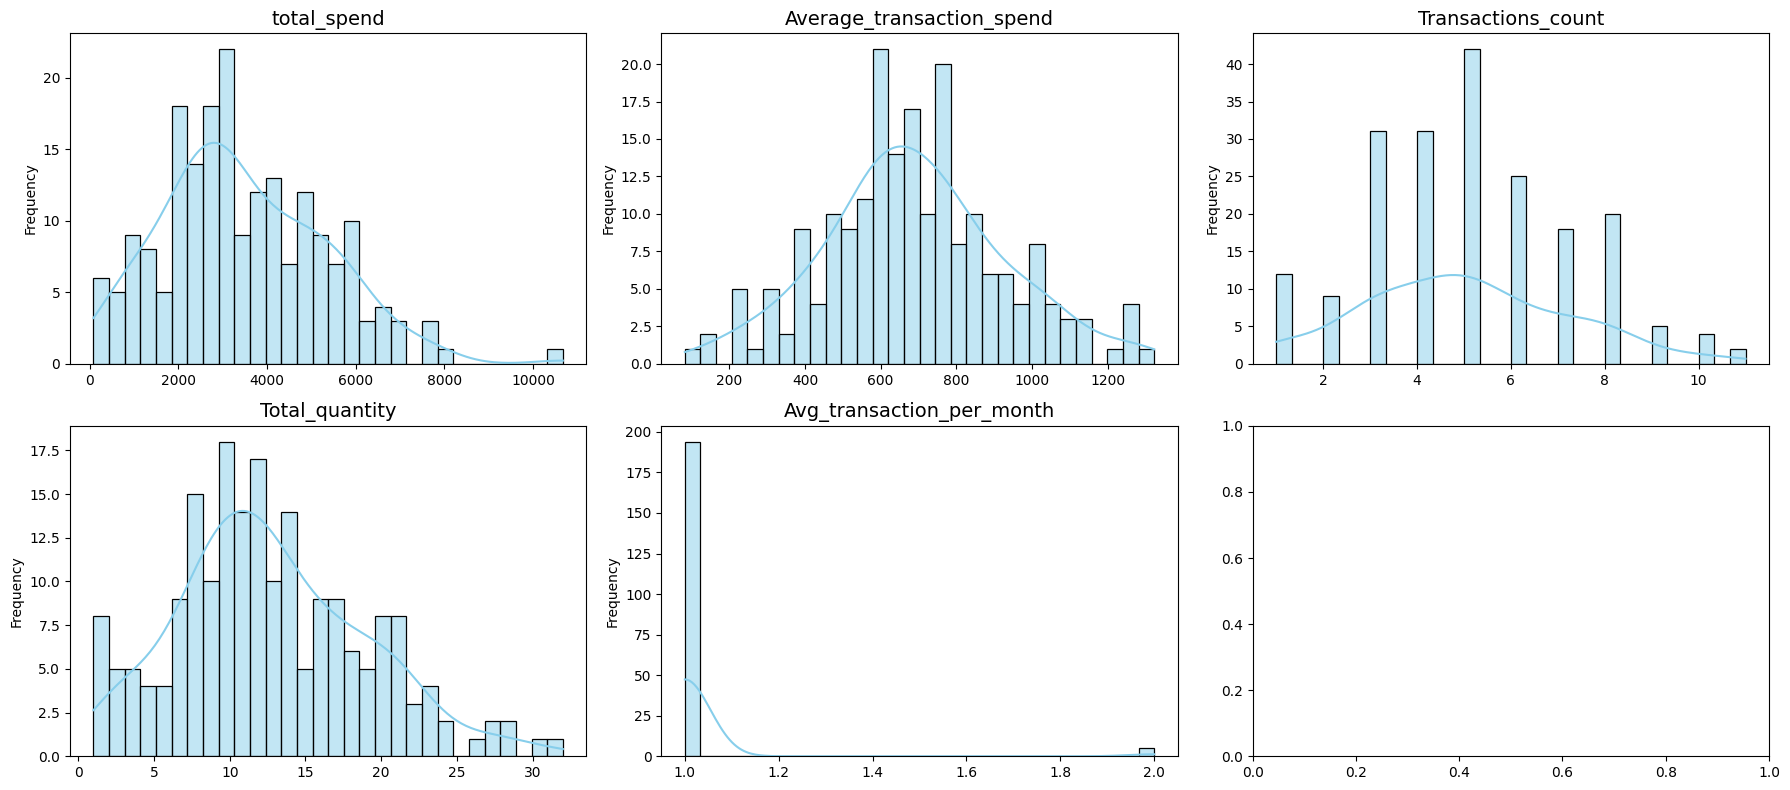

In [29]:
# Plotting the distribution Plot for each feature.
numerical_features = ["total_spend", "Average_transaction_spend", "Transactions_count", 
                      "Total_quantity", "Avg_transaction_per_month"]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))  
axes = axes.flatten()  


for i, feature in enumerate(numerical_features):
    sns.histplot(final_features[feature], kde=True, bins=30, color="skyblue", ax=axes[i]) 
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

plt.tight_layout() 
plt.show()

In [30]:
# Remove the outliers

numerical_features = ["total_spend", "Average_transaction_spend",'TransactionYear','SignupYear', "Transactions_count", "Total_quantity", "Avg_transaction_per_month"]
summary = final_features[numerical_features].describe()


Q1 = summary.loc["25%"]
Q3 = summary.loc["75%"]
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = (final_features[numerical_features] < lower_bound) | (final_features[numerical_features] > upper_bound)

outlier_counts = outliers.sum()
print("Outliers count per feature:\n", outlier_counts)


Outliers count per feature:
 total_spend                  1
Average_transaction_spend    5
TransactionYear              2
SignupYear                   0
Transactions_count           2
Total_quantity               2
Avg_transaction_per_month    5
dtype: int64


In [31]:
#Create a new dataframe without outilers
numerical_features = ["total_spend", "Average_transaction_spend", "Transactions_count", "Total_quantity",'TransactionYear',"Avg_transaction_per_month"]

Q1 = final_features[numerical_features].quantile(0.25)
Q3 = final_features[numerical_features].quantile(0.75)
IQR = Q3 - Q1  

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


df_cleaned = final_features[~((final_features[numerical_features] < lower_bound) | (final_features[numerical_features] > upper_bound)).any(axis=1)]


print(f"Original dataset shape: {final_features.shape}")
print(f"New dataset shape (without outliers): {df_cleaned.shape}")

df_cleaned.head()


Original dataset shape: (199, 8)
New dataset shape (without outliers): (183, 8)


,total_spend,Average_transaction_spend,Transactions_count,Total_quantity,TransactionYear,SignupYear,Avg_transaction_per_month,Region
0,3354.52,670.904,5,12,2024,2022,1,South America
1,1862.74,465.685,4,10,2024,2022,1,Asia
2,2725.38,681.345,4,14,2024,2024,1,South America
3,5354.88,669.360,8,23,2024,2022,1,South America
4,2034.24,678.080,3,7,2024,2022,1,Asia


In [32]:
encoded_transaction_year = pd.get_dummies(df_cleaned['TransactionYear'], prefix="TransactionYear").astype(int)
encoded_signup_year = pd.get_dummies(df_cleaned['SignupYear'], prefix="SignupYear").astype(int)
encoded_region = pd.get_dummies(df_cleaned['Region'], prefix="Region").astype(int)


final_df_cleaned= pd.concat([df_cleaned.drop(columns=['TransactionYear', 'SignupYear', 'Region']), 
                            encoded_transaction_year, encoded_signup_year, encoded_region], axis=1)



In [33]:
final_df_cleaned.head()

,total_spend,Average_transaction_spend,Transactions_count,Total_quantity,Avg_transaction_per_month,TransactionYear_2024,SignupYear_2022,SignupYear_2023,SignupYear_2024,Region_Asia,Region_Europe,Region_North America,Region_South America
0,3354.52,670.904,5,12,1,1,1,0,0,0,0,0,1
1,1862.74,465.685,4,10,1,1,1,0,0,1,0,0,0
2,2725.38,681.345,4,14,1,1,0,0,1,0,0,0,1
3,5354.88,669.360,8,23,1,1,1,0,0,0,0,0,1
4,2034.24,678.080,3,7,1,1,1,0,0,1,0,0,0


In [34]:

encoded_transaction_year = pd.get_dummies(final_features['TransactionYear'], prefix="TransactionYear").astype(int)
encoded_signup_year = pd.get_dummies(final_features['SignupYear'], prefix="SignupYear").astype(int)
encoded_region = pd.get_dummies(final_features['Region'], prefix="Region").astype(int)


final_df = pd.concat([final_features.drop(columns=['TransactionYear', 'SignupYear', 'Region']), 
                            encoded_transaction_year, encoded_signup_year, encoded_region], axis=1)




In [35]:
final_df.head()

,total_spend,Average_transaction_spend,Transactions_count,Total_quantity,Avg_transaction_per_month,TransactionYear_2023,TransactionYear_2024,SignupYear_2022,SignupYear_2023,SignupYear_2024,Region_Asia,Region_Europe,Region_North America,Region_South America
0,3354.52,670.904,5,12,1,0,1,1,0,0,0,0,0,1
1,1862.74,465.685,4,10,1,0,1,1,0,0,1,0,0,0
2,2725.38,681.345,4,14,1,0,1,0,0,1,0,0,0,1
3,5354.88,669.360,8,23,1,0,1,1,0,0,0,0,0,1
4,2034.24,678.080,3,7,1,0,1,1,0,0,1,0,0,0


## Clustering

### K-means clustering

In [36]:
# Clustering the Data using the K-means, k from 2 to 10.
# Calculate the DB Index and silhouette_scores for every K value.
def find_optimal_clusters(X, max_k=10):
    inertia = []
    silhouette_scores = []
    db_scores = []

    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        db_scores.append(davies_bouldin_score(X, kmeans.labels_))


    plt.figure(figsize=(18, 5))

    # Elbow Method
    plt.subplot(1, 3, 1)
    plt.plot(range(2, max_k+1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    # Silhouette Score
    plt.subplot(1, 3, 2)
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o', color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')

    # Davies-Bouldin Index
    plt.subplot(1, 3, 3)
    plt.plot(range(2, max_k+1), db_scores, marker='o', color='green')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Davies-Bouldin Index Method')
    print("silhouette_scores :",silhouette_scores)
    print()
    print("db_scores :",db_scores)
    plt.show()



In [276]:
# Consider few features which are useful for the customer segementaions
features=['total_spend','Average_transaction_spend','Transactions_count','Region_Asia','Region_Europe','Region_North America','Region_South America']

In [277]:
### create a new dataframe using the outlier removed data and certain features
X_cleaned=final_df_cleaned[features]
scaler=StandardScaler()
X_scaled_cleaned=scaler.fit_transform(X_cleaned)

silhouette_scores : [0.19176638529559117, 0.3452952137226586, 0.4565334258774649, 0.40672981985684303, 0.4299301164498752, 0.42829313236499783, 0.40433543059701604, 0.3853162865937143, 0.4022202157108019]

db_scores : [1.9459179635676167, 1.37362150344226, 0.9596701928148467, 0.9193281570364432, 0.8469401836357536, 0.8273515222473045, 0.9124247222588979, 0.9302126552632467, 0.8611303455769681]


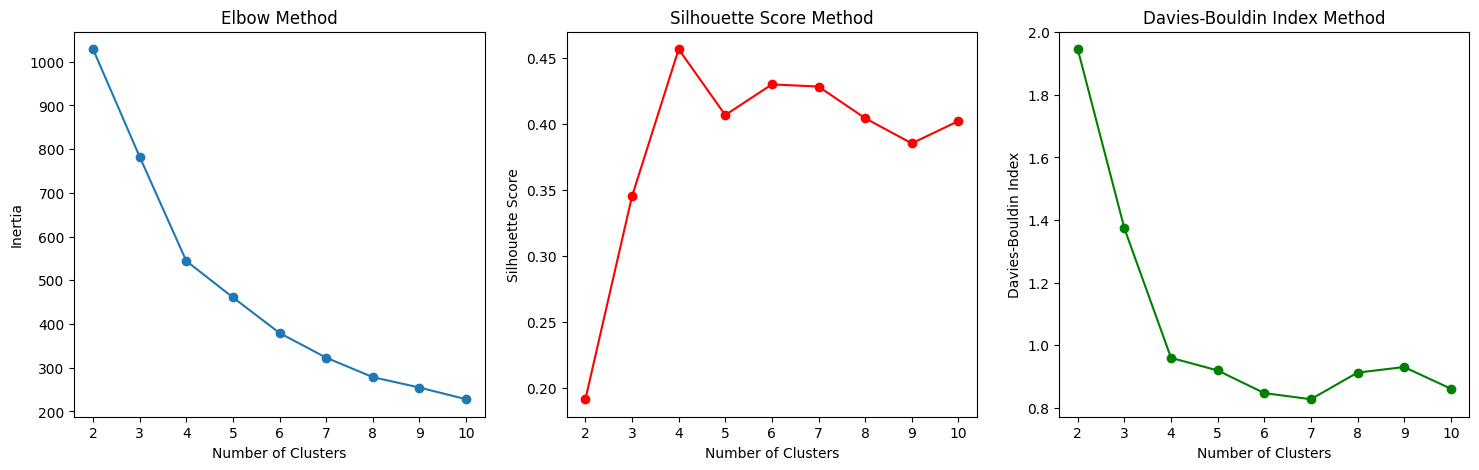

In [278]:
find_optimal_clusters(X_scaled_cleaned)

### Visualizing the clustering for optimal K=4 from the above graphs.

In [279]:
def visualize_kmeans(x_scaled,clusters):
    #K-Means
    kmeans = KMeans(n_clusters=clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(x_scaled)
    
    #PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x_scaled)

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(x_scaled)

    # Plot PCA Visualization for K-Means
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='bright', alpha=0.7)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'K-Means k={clusters} - PCA Visualization')

    # Plot t-SNE Visualization for K-Means
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='bright', alpha=0.7)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f'K-Means k=(clusters) - t-SNE Visualization')

    plt.show()


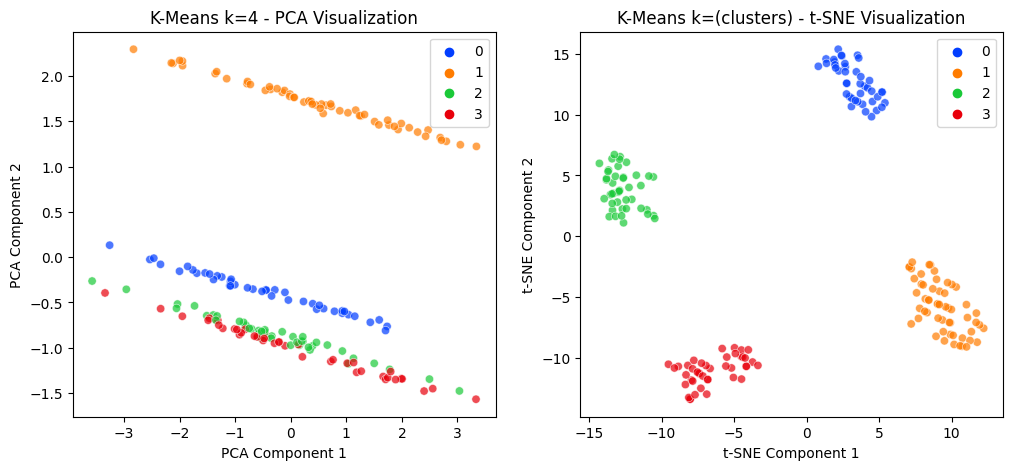

In [280]:
visualize_kmeans(X_scaled_cleaned,4)

In [281]:
#Create a dataframe with outilers and certain features
X=final_df[features]
X_scaled=StandardScaler().fit_transform(X)

silhouette_scores : [0.23571969751276364, 0.34760712541076305, 0.4595233237921879, 0.4094863411256868, 0.40438815824204105, 0.4194398466522549, 0.4051122275123137, 0.4029995833801285, 0.3851113288096281]

db_scores : [1.5063852656083256, 1.369378722670147, 0.9355298648489481, 0.915511988062665, 0.9072283597505928, 0.8456878765392173, 0.9064207612156978, 0.8885094542635898, 0.9016212973213676]


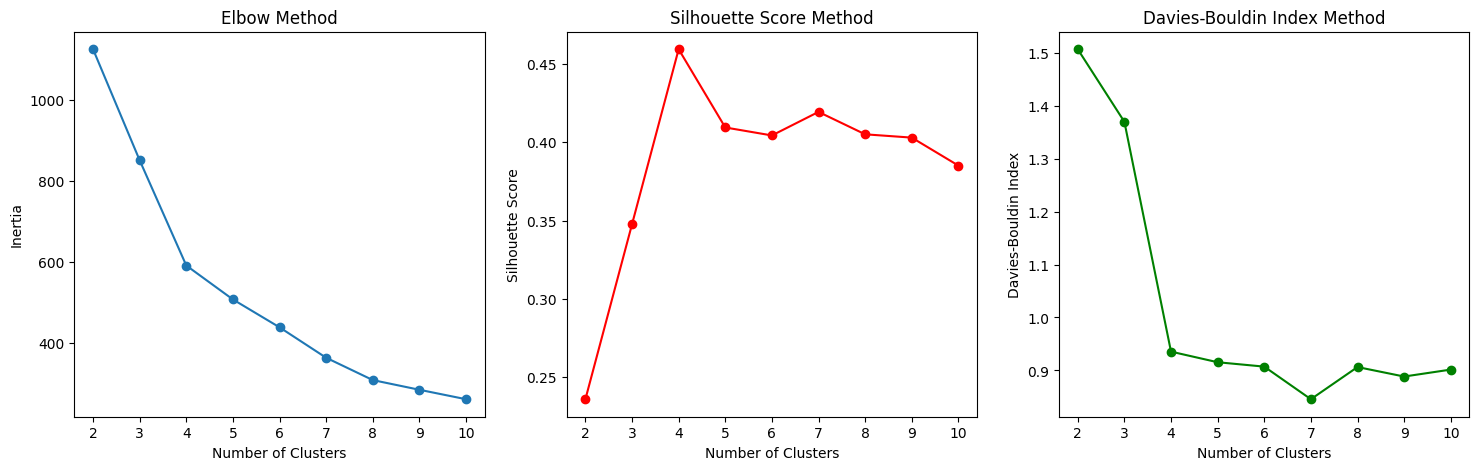

In [282]:
find_optimal_clusters(X_scaled)

### visualize the clustering for k=5

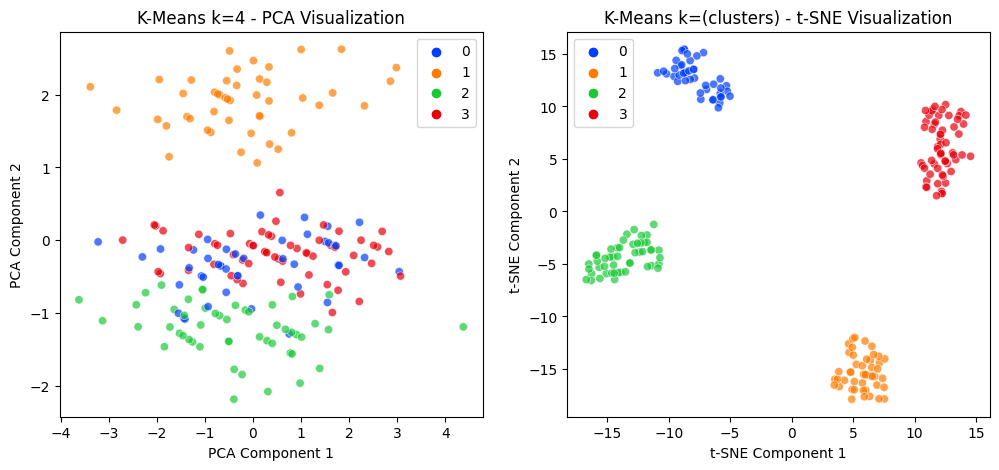

In [283]:

visualize_kmeans(X_scaled,4)

### Hierarchical clustering

In [58]:
def evaluate_hierarchical(X, max_k=10):
    silhouette_scores = []
    db_scores = []

    for k in range(2, max_k+1):
        agglo = AgglomerativeClustering(n_clusters=k)
        labels = agglo.fit_predict(X)

        silhouette_scores.append(silhouette_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o', color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Hierarchical Clustering - Silhouette Score')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k+1), db_scores, marker='o', color='green')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Hierarchical Clustering - Davies-Bouldin Index')
    
    print("silhouette_scores :",silhouette_scores)
    print("db_scores :",db_scores)
    
    plt.show()


silhouette_scores : [0.2326692027711724, 0.3452952137226586, 0.4565334258774649, 0.4479622549094036, 0.4225085551291117, 0.41668886293179985, 0.38686178067342764, 0.3769284031416575, 0.3916912261374168]
db_scores : [1.5673107989764659, 1.37362150344226, 0.9596701928148466, 0.8603691962853457, 0.8459239213126986, 0.8310967778632616, 0.9386262223299854, 0.9578387990409527, 0.8908719793016766]


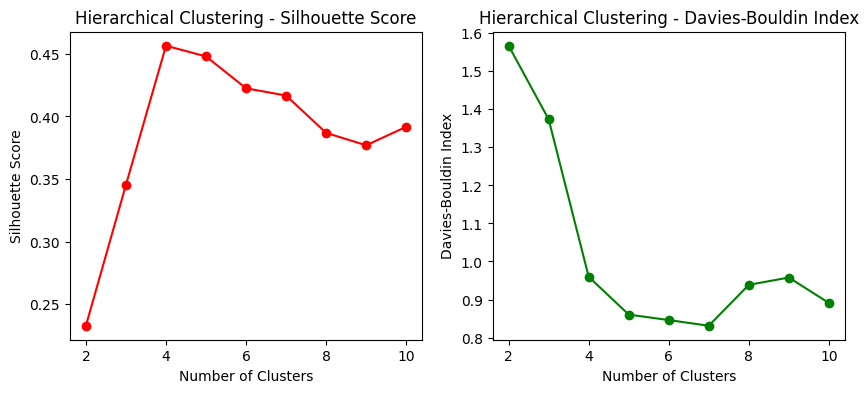

In [59]:

evaluate_hierarchical(X_scaled_cleaned, max_k=10)

In [254]:
def visualize_hierarchical(x_scaled,clusters):
    # Apply Hierarchical Clustering with K=2
    hierarchical = AgglomerativeClustering(n_clusters=clusters)
    labels = hierarchical.fit_predict(x_scaled)

    # PCA 
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x_scaled)

    #t-SNE 
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(x_scaled)

    # Plot PCA Visualization
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='bright', alpha=0.7)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'Hierarchical k={clusters} - PCA Visualization')

    # Plot t-SNE Visualization
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='bright')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f'Hierarchical k={clusters} - t-SNE Visualization')

    plt.show()


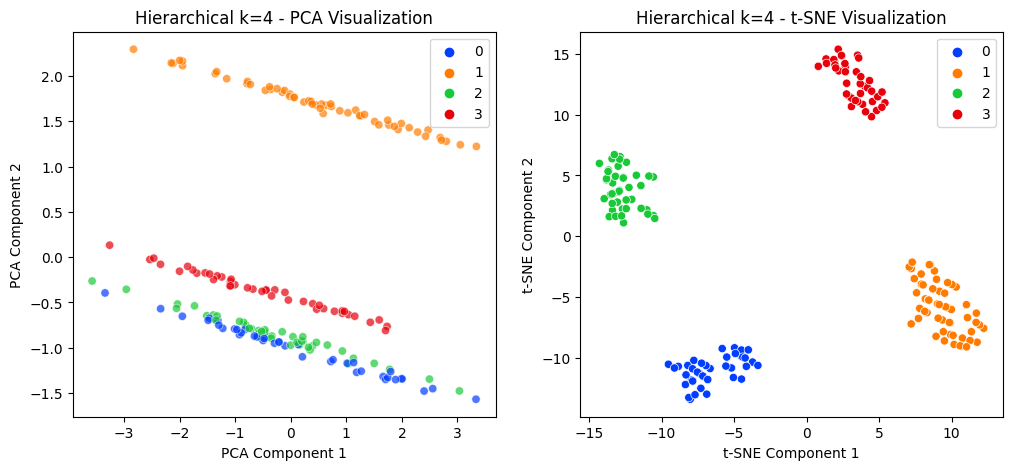

In [255]:
visualize_hierarchical(X_scaled_cleaned,4)

silhouette_scores : [0.23218665882864445, 0.34760712541076305, 0.4595233237921879, 0.40525019244630256, 0.4027843092618748, 0.41657173897478267, 0.41187198882765236, 0.390412546678364, 0.39059823274527145]
db_scores : [1.5369648166873862, 1.369378722670147, 0.9355298648489483, 0.9186684717004695, 0.9044654982073176, 0.8421604757332914, 0.8528996491458146, 0.898383532539416, 0.9152579846595561]


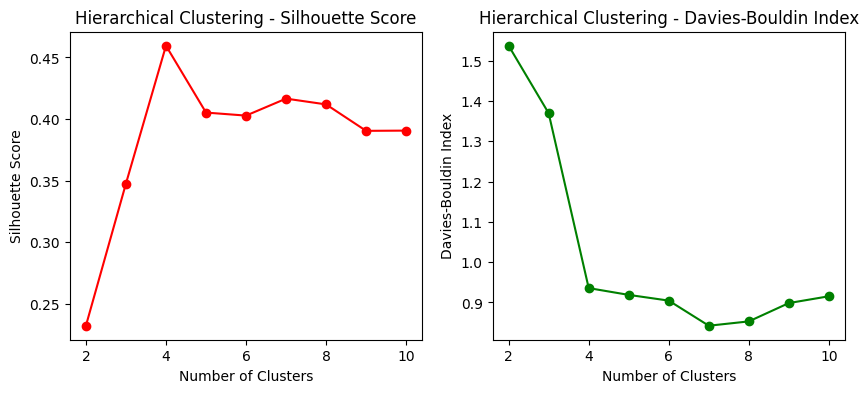

In [256]:
evaluate_hierarchical(X_scaled, max_k=10)

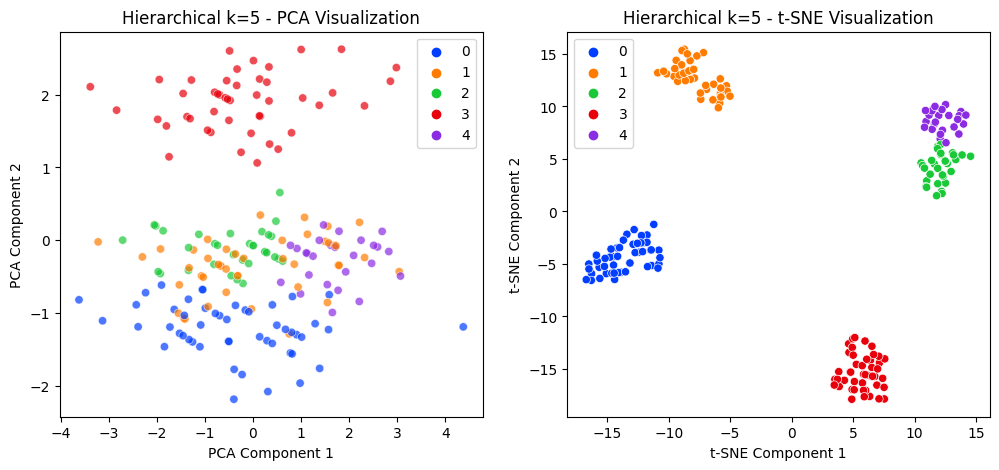

In [257]:

visualize_hierarchical(X_scaled,5)

### DB SCAN

In [64]:

def evaluate_dbscan(X, eps_values):
    silhouette_scores = []
    db_scores = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=int(np.log(len(X))))  
        labels = dbscan.fit_predict(X)

        # Only evaluate if clusters are formed
        if len(set(labels)) > 1:
            silhouette_scores.append(silhouette_score(X, labels))
            db_scores.append(davies_bouldin_score(X, labels))
        else:
            silhouette_scores.append(np.nan)
            db_scores.append(np.nan)

    # Plotting
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(eps_values, silhouette_scores, marker='o', color='red')
    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Silhouette Score')
    plt.title('DBSCAN Silhouette Score')

    plt.subplot(1, 2, 2)
    plt.plot(eps_values, db_scores, marker='o', color='green')
    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('DBSCAN Davies-Bouldin Index')
    print("silhouette_scores :",silhouette_scores)
    print("db_scores :",db_scores)

    plt.show()


eps_values = np.linspace(0.1, 5, 10) 


silhouette_scores : [nan, 0.13290004512105508, 0.4335813180191337, 0.4565334258774649, 0.4565334258774649, 0.4565334258774649, nan, nan, nan, nan]
db_scores : [nan, 1.575072539417645, 2.4929925742098833, 0.9596701928148466, 0.9596701928148466, 0.9596701928148466, nan, nan, nan, nan]


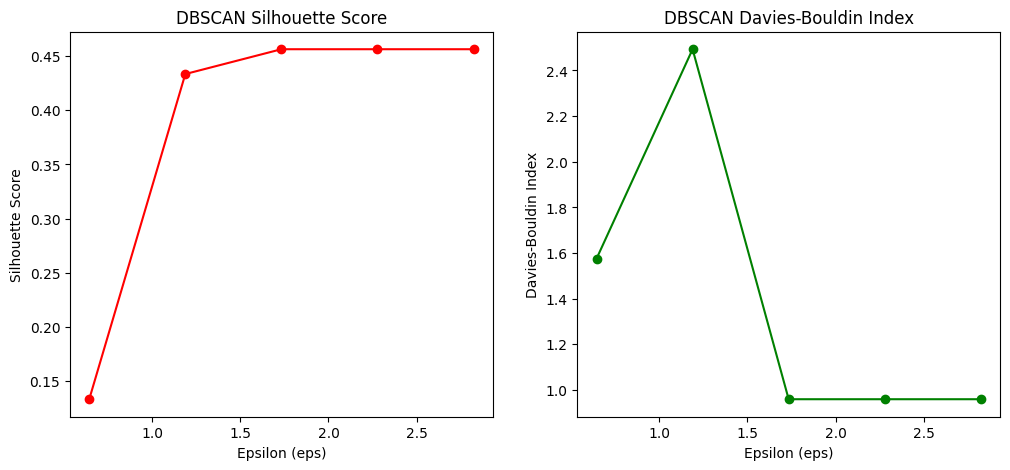

In [65]:
evaluate_dbscan(X_scaled_cleaned, eps_values)

In [66]:
def visualize_dbscan(x_scaled,eps):

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=int(np.log(len(x_scaled))))  
    dbscan_labels = dbscan.fit_predict(x_scaled)


    # PCA 
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x_scaled)

    # t-SNE 
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(x_scaled)

    #  PCA Visualization 
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='coolwarm', alpha=0.7)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('DBSCAN - PCA Visualization')

    # t-SNE Visualization 
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=dbscan_labels, palette='coolwarm', alpha=0.7)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('DBSCAN - t-SNE Visualization')

    plt.show()



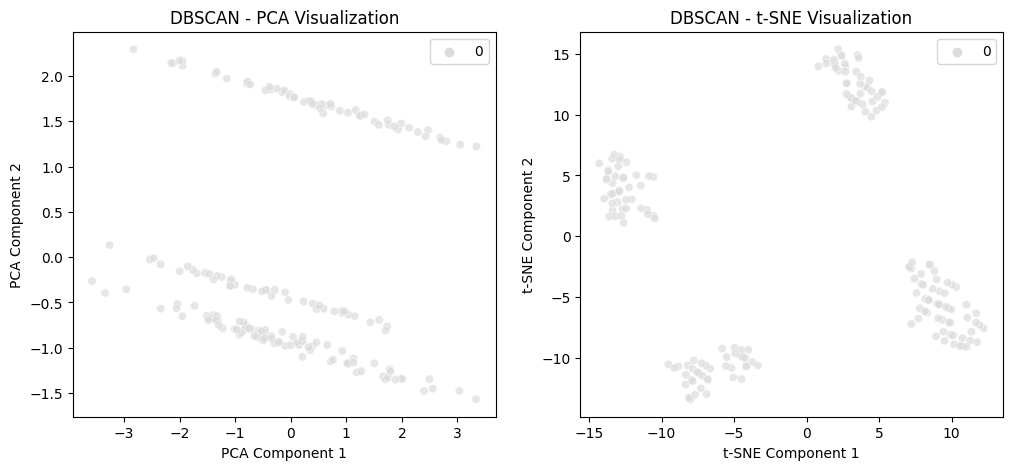

In [67]:
visualize_dbscan(X_scaled_cleaned,4)

silhouette_scores : [nan, 0.12822243174479642, 0.4237847843358331, 0.4542891438115982, 0.4542891438115982, 0.4542891438115982, 0.5174687812202344, 0.5174687812202344, 0.5174687812202344, 0.5174687812202344]
db_scores : [nan, 1.7279392423246966, 2.063579238338826, 0.9155207039932984, 0.9155207039932984, 0.9155207039932984, 0.8071424449337777, 0.8071424449337777, 0.8071424449337777, 0.8071424449337777]


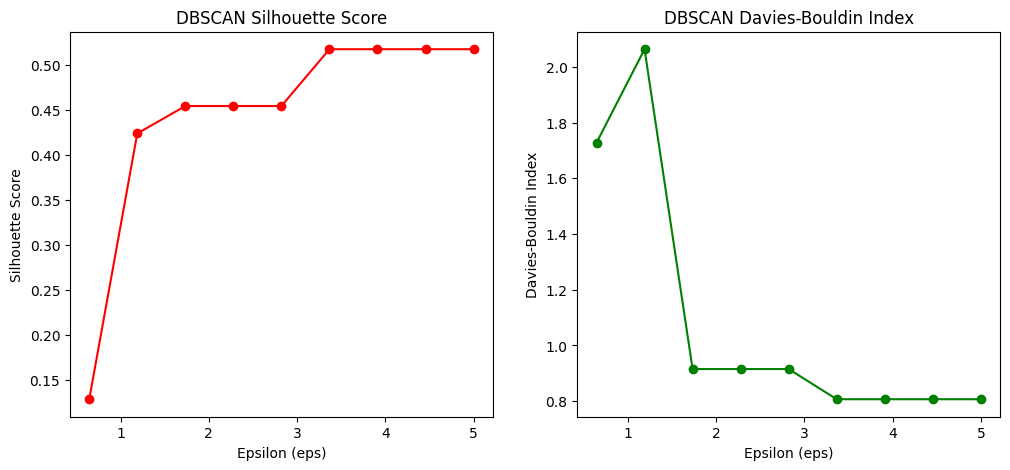

In [68]:
evaluate_dbscan(X_scaled, eps_values)

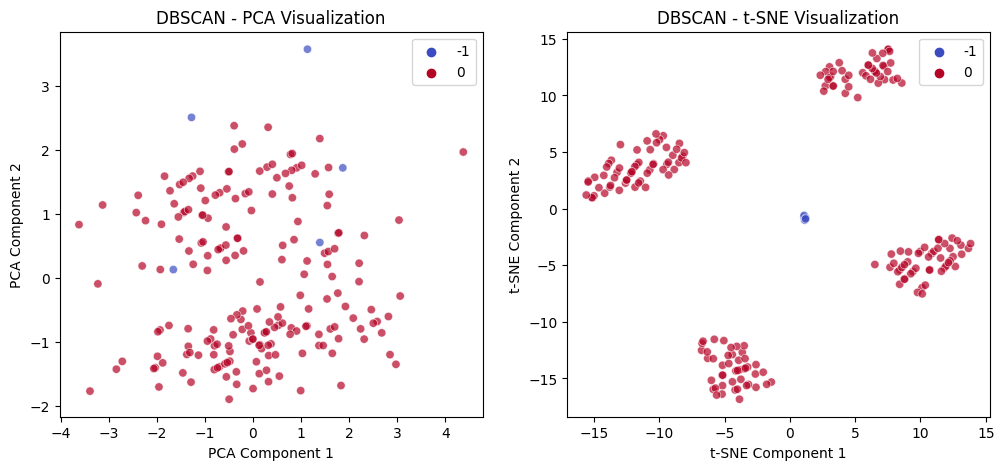

In [69]:
visualize_dbscan(X_scaled,4)

## Clustering Summary
- Kmeans and Hierarchical Clustering working same.
- Optimal Clusters for Segementation is 5.

In [295]:
# Consider few features which are useful for the customer segementaions
feature=['total_spend','Average_transaction_spend','Transactions_count','Region_Asia','Region_Europe','Region_North America','Region_South America']

In [296]:
X=final_df[feature]
X.head()

,total_spend,Average_transaction_spend,Transactions_count,Region_Asia,Region_Europe,Region_North America,Region_South America
0,3354.52,670.904,5,0,0,0,1
1,1862.74,465.685,4,1,0,0,0
2,2725.38,681.345,4,0,0,0,1
3,5354.88,669.360,8,0,0,0,1
4,2034.24,678.080,3,1,0,0,0


In [297]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels=kmeans.fit_predict(StandardScaler().fit_transform(X))
print(davies_bouldin_score(StandardScaler().fit_transform(X), kmeans.labels_))

0.9355298648489481


In [298]:
X["KMeans_Cluster"] = kmeans_labels
kmeans_summary = X.groupby("KMeans_Cluster").mean()
print("K-Means Clustering Summary:")
kmeans_summary

K-Means Clustering Summary:


/tmp/ipykernel_4055/768075519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["KMeans_Cluster"] = kmeans_labels


,total_spend,Average_transaction_spend,Transactions_count,Region_Asia,Region_Europe,Region_North America,Region_South America
KMeans_Cluster,,,,,,,
0,3456.249318,709.909207,4.954545,1.0,0.0,0.0,0.0
1,3311.160870,639.956633,5.304348,0.0,0.0,1.0,0.0
2,3325.092600,696.301203,4.680000,0.0,1.0,0.0,0.0
3,3717.840000,700.667556,5.152542,0.0,0.0,0.0,1.0


In [273]:
X.head()

,total_spend,Average_transaction_spend,Transactions_count,Region_Asia,Region_Europe,Region_North America,Region_South America,KMeans_Cluster
0,3354.52,670.904,5,0,0,0,1,2
1,1862.74,465.685,4,1,0,0,0,3
2,2725.38,681.345,4,0,0,0,1,2
3,5354.88,669.360,8,0,0,0,1,2
4,2034.24,678.080,3,1,0,0,0,3


### Conclusion

- Clustering was performed with and without outliers; keeping outliers gave better results.
- Some high-spending customers were wrongly classified as outliers, but they are important for business.
- t-SNE visualization showed distinct 4 groups, confirming effective segmentation.
- Cluster 0 → Moderate spenders, balanced transactions.
- Cluster 1 → High transaction customers from North America.
- Cluster 2 → European customers with moderate spending.
- Cluster 3 → Highest spending customers from South America.
- Spending and transaction frequency vary by region, making segmentation useful for targeted marketing.
- Keeping outliers improved DB index and silhouette score, proving better cluster quality.
- Final Decision: 4-group segmentation is effective and can be used for business insights.